In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# for imputing missing values
from sklearn.impute import SimpleImputer
# for categorical encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
# for linear regression
from sklearn.linear_model import LinearRegression
# for accuracy check
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv('./Life Expectancy Data.csv')
data.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
768,Djibouti,2000,Developing,57.4,325.0,2,1.34,91.950759,NaN,183,...,46.0,5.75,46.0,4.1,768.176767,717584.0,6.4,6.1,0.361,2.9
1954,Pakistan,2003,Developing,63.5,185.0,366,0.01,24.234557,63.0,4740,...,69.0,2.61,67.0,0.1,563.594342,1477341.0,21.6,22.0,0.465,5.6
2205,Samoa,2010,Developing,72.6,144.0,0,3.01,434.794068,57.0,8,...,57.0,5.70,62.0,0.1,3453.487434,18625.0,0.2,0.2,0.690,12.9
718,Democratic People's Republic of Korea,2002,Developing,67.6,167.0,14,3.08,0.000000,NaN,0,...,99.0,NaN,64.0,0.1,NaN,NaN,5.9,5.9,NaN,NaN
1795,Myanmar,2000,Developing,62.1,243.0,73,0.35,2.511437,NaN,845,...,88.0,1.84,82.0,0.4,193.187484,4695462.0,13.3,13.7,0.417,7.5
2266,Serbia,2014,Developing,75.4,123.0,1,9.09,8.617208,92.0,37,...,93.0,1.37,93.0,0.1,62.173221,713576.0,2.1,2.1,0.771,14.3
1297,Italy,2000,Developed,79.4,77.0,3,9.78,31.505822,94.0,1457,...,97.0,7.91,87.0,0.1,251.242600,5694218.0,0.5,0.5,0.823,14.8
1403,Kuwait,2006,Developing,73.6,89.0,1,0.01,2443.444275,99.0,0,...,99.0,2.25,99.0,0.1,42717.557250,NaN,3.2,3.1,0.787,14.1
2800,United States of America,2009,Developed,78.5,18.0,26,8.71,0.000000,92.0,71,...,93.0,17.00,95.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
1298,Jamaica,2015,Developing,76.2,125.0,1,NaN,0.000000,91.0,0,...,91.0,NaN,91.0,0.5,4965.989857,2871934.0,1.8,1.7,0.729,12.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

##### check value-counts of categorical values

In [6]:
data['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [7]:
data['Country'].value_counts().sort_values(ascending=False).values

array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1], dtype=int64)

###### Check correlation using heatmap

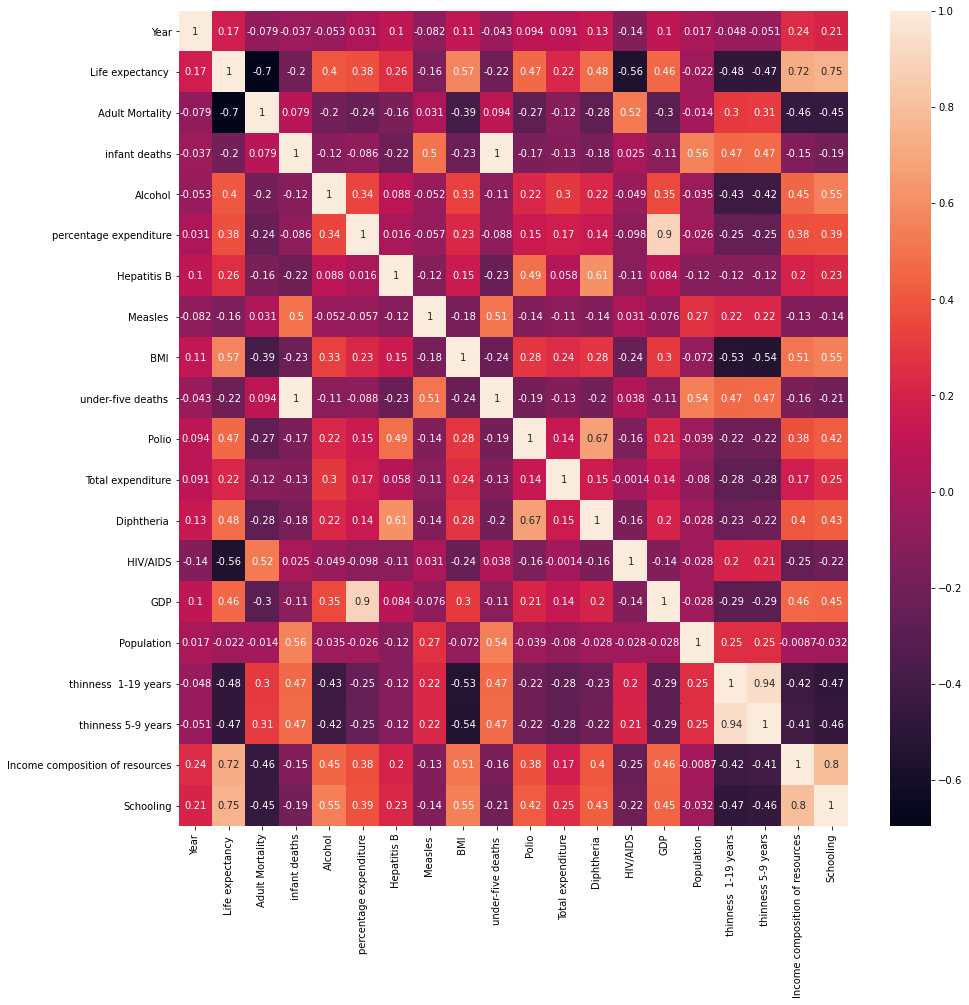

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True);

In [9]:
data.corr()['Life expectancy '].drop('Life expectancy ')

Year                               0.170033
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Measles                           -0.157586
 BMI                               0.567694
under-five deaths                 -0.222529
Polio                              0.465556
Total expenditure                  0.218086
Diphtheria                         0.479495
 HIV/AIDS                         -0.556556
GDP                                0.461455
Population                        -0.021538
 thinness  1-19 years             -0.477183
 thinness 5-9 years               -0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy , dtype: float64

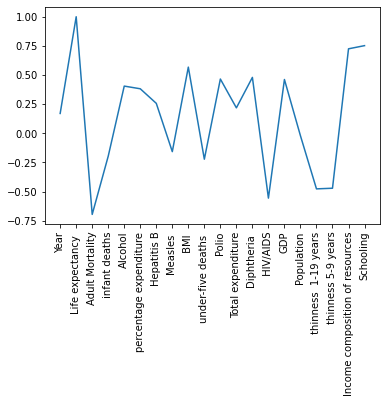

In [10]:
cols=['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
x=data.corr()['Life expectancy ']
plt.xticks(rotation=90)
plt.plot(x)
plt.show()

#### Data preprocessing

###### extracting X and Y

In [11]:
x=(data.drop(['Life expectancy ','Country'],1)).iloc[:,:].values
y=data.iloc[:,3].values

##### Imputing the missing values

In [12]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
x[:,2:21]=imputer.fit_transform(x[:,2:21])
y=imputer.fit_transform(y.reshape(-1,1))

In [13]:
x[1,:]

array([2014, 'Developing', 271.0, 64.0, 0.01, 73.52358168, 62.0, 492.0,
       18.6, 86.0, 58.0, 8.18, 62.0, 0.1, 612.696514, 327582.0, 17.5,
       17.5, 0.47600000000000003, 10.0], dtype=object)

In [14]:
# cross check
print('x : ',pd.DataFrame(x).isna().sum())
print('y : ',np.isnan(y).sum())

x :  0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64
y :  0


###### encoding categorical values

In [15]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=(ct.fit_transform(x))

In [16]:
x[1,:]

array([0.0, 1.0, 2014, 271.0, 64.0, 0.01, 73.52358168, 62.0, 492.0, 18.6,
       86.0, 58.0, 8.18, 62.0, 0.1, 612.696514, 327582.0, 17.5, 17.5,
       0.47600000000000003, 10.0], dtype=object)

###### feature scaling

In [17]:
sc=StandardScaler()
x=sc.fit_transform(x)
np.set_printoptions(suppress=True) # using this command, we convert the scientific notation into readable format
x

array([[-0.45939851,  0.45939851,  1.6217623 , ...,  2.77327898,
        -0.72540055, -0.57993072],
       [-0.45939851,  0.45939851,  1.40498625, ...,  2.81790246,
        -0.74005007, -0.61056961],
       [-0.45939851,  0.45939851,  1.1882102 , ...,  2.86252595,
        -0.7693491 , -0.6412085 ],
       ...,
       [-0.45939851,  0.45939851, -1.19632639, ..., -0.79659991,
        -0.97932554, -0.61056961],
       [-0.45939851,  0.45939851, -1.41310244, ..., -0.70735294,
        -0.97932554, -0.6718474 ],
       [-0.45939851,  0.45939851, -1.62987849, ...,  1.41226265,
        -0.94514333, -0.6718474 ]])

###### split the data into training and testing data

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=50)

###### Apply linear regression

In [19]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

##### Testing with test dataset

In [20]:
y_pred=reg.predict(x_test)

###### Checking the accuracy of the model

In [21]:
r2_score(y_test,y_pred)

0.8173919248851159